# Apparels Image Classification
## Problem Statement
The problem is to based on Fashin-MNIST dataset which is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Each training and test example is assigned to one of the following labels:

<table>
    <th>Label</th>
    <th>Description</th>
    <tr>
        <td>0</td>
        <td>T-shirt/top</td>
    </tr>
    <tr>
        <td>1</td>
        <td>Trouser</td>
    </tr>
    <tr>
        <td>2</td>
        <td>Pullover</td>
    </tr>
    <tr>
        <td>3</td>
        <td>Dress</td>
    </tr>
    <tr>
        <td>4</td>
        <td>Coat</td>
    </tr>
    <tr>
        <td>5</td>
        <td>Sandal</td>
    </tr>
    <tr>
        <td>6</td>
        <td>Shirt</td>
    </tr>
    <tr>
        <td>7</td>
        <td>Sneaker</td>
    </tr>
    <tr>
        <td>8</td>
        <td>Bag</td>
    </tr>
    <tr>
        <td>9</td>
        <td>Ankle Boot</td>
    </tr>
</table>[](http://)

In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

%matplotlib inline
np.random.seed(1)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/fashion-mnist_test.csv


### Read train and test data

In [40]:
data_train = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
data_test = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

In [41]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

# #Here we split validation data to optimiza classifier during training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# #Test data
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(48000, 784)
(48000, 10)
(12000, 784)
(12000, 10)
(10000, 784)
(10000, 10)


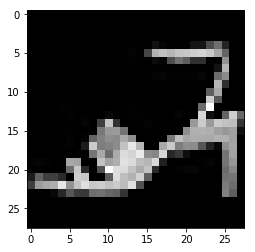

In [42]:
index = 0
plt.imshow(X_train[9].reshape(28, 28), cmap='gray', interpolation='none')

### Train a Simple Neural Network
1. Two Layers of 128 Nodes
2. First layer has droput and batch normalization
3. Relu Activation function is used for input and hidden layers and softmax activation function for output layer
4. Adam Optimizer is used which combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.

In [43]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization

num_classes = 10

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784, )))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', input_shape=(784, )))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 118,794
Trainable params: 118,538
Non-trainable params: 256
_________________________________________________________________


In [45]:
epochs = 100
history = model.fit(X_train, y_train,
          batch_size=256,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 2s 45us/step - loss: 0.6298 - acc: 0.7820 - val_loss: 0.4309 - val_acc: 0.8465
Epoch 2/100
48000/48000 [==============================] - 1s 29us/step - loss: 0.4297 - acc: 0.8431 - val_loss: 0.3793 - val_acc: 0.8617
Epoch 3/100
48000/48000 [==============================] - 1s 28us/step - loss: 0.3966 - acc: 0.8560 - val_loss: 0.3693 - val_acc: 0.8640
Epoch 4/100
48000/48000 [==============================] - 1s 29us/step - loss: 0.3770 - acc: 0.8619 - val_loss: 0.3681 - val_acc: 0.8606
Epoch 5/100
48000/48000 [==============================] - 1s 29us/step - loss: 0.3683 - acc: 0.8648 - val_loss: 0.3528 - val_acc: 0.8692
Epoch 6/100
48000/48000 [==============================] - 1s 28us/step - loss: 0.3509 - acc: 0.8709 - val_loss: 0.3799 - val_acc: 0.8643
Epoch 7/100
48000/48000 [==============================] - 1s 28us/step - loss: 0.3433 - acc: 0.8731 - val_loss: 0.3605 - 

48000/48000 [==============================] - 1s 28us/step - loss: 0.2099 - acc: 0.9197 - val_loss: 0.3495 - val_acc: 0.8850
Epoch 60/100
48000/48000 [==============================] - 1s 28us/step - loss: 0.2129 - acc: 0.9202 - val_loss: 0.3239 - val_acc: 0.8913
Epoch 61/100
48000/48000 [==============================] - 1s 28us/step - loss: 0.2125 - acc: 0.9196 - val_loss: 0.3314 - val_acc: 0.8853
Epoch 62/100
48000/48000 [==============================] - 1s 28us/step - loss: 0.2024 - acc: 0.9228 - val_loss: 0.3486 - val_acc: 0.8821
Epoch 63/100
48000/48000 [==============================] - 1s 28us/step - loss: 0.2072 - acc: 0.9215 - val_loss: 0.3448 - val_acc: 0.8856
Epoch 64/100
48000/48000 [==============================] - 1s 28us/step - loss: 0.2059 - acc: 0.9207 - val_loss: 0.3375 - val_acc: 0.8847
Epoch 65/100
48000/48000 [==============================] - 1s 28us/step - loss: 0.2039 - acc: 0.9214 - val_loss: 0.3284 - val_acc: 0.8875
Epoch 66/100
48000/48000 [==============

In [46]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.34792304938435553
Test accuracy: 0.894


### Accuracy and Loss Plots on training and validation set

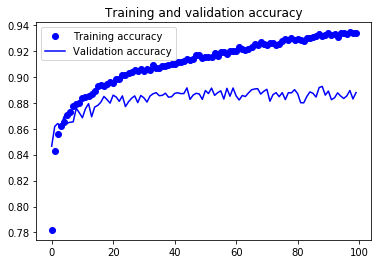

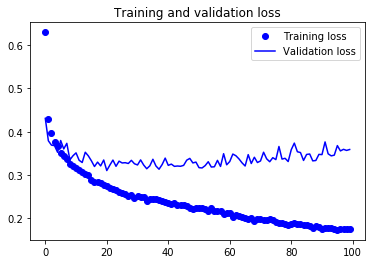

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()